[View in Colaboratory](https://colab.research.google.com/github/namlih/Bitcoin-Prediction/blob/master/ARIMA_test_size_60.ipynb)

In [1]:
from pandas import *
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import matplotlib
import numpy
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import requests
binance  = "https://www.binance.com/api/v1/klines?symbol=BTCUSDT&interval=1d"
r = requests.get(binance)
data = r.json()

from math import log10
df = DataFrame(columns=["price"])
for row in data:
    df = df.append(DataFrame([float(row[1])],columns=df.columns))
df.index = [i for i in range(df.shape[0])]
df

,price
0,4261.48
1,4285.08
2,4108.37
3,4120.98
4,4069.13
5,4016.00
6,4040.00
7,4147.00
8,4316.01
9,4280.71


In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# create a differenced series
def difference_arima(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value) 
    return diff

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, test_size, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train, test = X[0:-test_size], X[-test_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        interval = 7
        diff = difference_arima(history, interval)
        
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, interval)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse,predictions

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, test_size,p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    preds = list()
    best_preds = list()
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    #print(order)
                    mse,preds = evaluate_arima_model(dataset, test_size, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        best_preds = [p for p in preds]
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_preds

In [0]:
import time
p_values = range(0, 7)
d_values = range(0, 7)
q_values = range(0, 7)

warnings.filterwarnings("ignore")
test_size=60
date_index = date_range('08-01-2017',periods=df.shape[0],freq='D')
series = Series(df['price'].values,index=date_index)

st = time.time()
predictions = evaluate_models(series.values,test_size, p_values, d_values, q_values)
ft = time.time()

ARIMA(0, 0, 1) RMSE=882.056
ARIMA(0, 1, 1) RMSE=590.790
ARIMA(0, 1, 2) RMSE=619.801
ARIMA(0, 1, 3) RMSE=621.664
ARIMA(0, 1, 4) RMSE=609.599
ARIMA(0, 1, 5) RMSE=619.892
ARIMA(0, 2, 1) RMSE=582.027
ARIMA(0, 2, 2) RMSE=592.450
ARIMA(1, 0, 1) RMSE=577.875
ARIMA(1, 0, 2) RMSE=585.879
ARIMA(1, 0, 3) RMSE=591.926
ARIMA(1, 0, 4) RMSE=596.548
ARIMA(1, 0, 5) RMSE=556.331
ARIMA(1, 0, 6) RMSE=458.242
ARIMA(1, 1, 1) RMSE=619.491
ARIMA(1, 1, 2) RMSE=580.869
ARIMA(1, 1, 3) RMSE=589.511
ARIMA(1, 1, 4) RMSE=612.215
ARIMA(1, 1, 5) RMSE=621.734
ARIMA(1, 1, 6) RMSE=532.591
ARIMA(1, 2, 1) RMSE=587.381
ARIMA(1, 2, 2) RMSE=621.490
ARIMA(1, 2, 3) RMSE=625.258
ARIMA(1, 2, 5) RMSE=615.504
ARIMA(1, 2, 6) RMSE=605.574
ARIMA(2, 0, 1) RMSE=599.806
ARIMA(2, 0, 2) RMSE=595.782
ARIMA(2, 0, 3) RMSE=586.489
ARIMA(2, 0, 4) RMSE=555.259
ARIMA(2, 0, 5) RMSE=503.905
ARIMA(2, 0, 6) RMSE=468.751
ARIMA(2, 1, 1) RMSE=571.806
ARIMA(2, 1, 2) RMSE=611.686
ARIMA(2, 1, 3) RMSE=583.321
ARIMA(2, 1, 4) RMSE=559.480
ARIMA(2, 1, 6) RMSE=

ARIMA(6, 1, 3) RMSE=564.987
ARIMA(6, 1, 4) RMSE=511.638
ARIMA(6, 1, 5) RMSE=504.176
ARIMA(6, 1, 6) RMSE=478.876
ARIMA(6, 2, 1) RMSE=640.651
ARIMA(6, 2, 2) RMSE=643.461
Best ARIMA(1, 0, 6) RMSE=458.242


In [0]:
if type(predictions[0]) != numpy.float64:
    _preds = list()
    for x in predictions:
        _preds.append(x[0])
else: _preds = [p for p in predictions]

In [7]:
ft-st

4718.190112829208

In [8]:
def sMAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / ((y_true + y_pred)/2) )) * 100
sMAPE(df['price'].values[-test_size:],_preds)

4.650948846593017

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df['price'][-test_size:], _preds))
rms

458.24171659376225

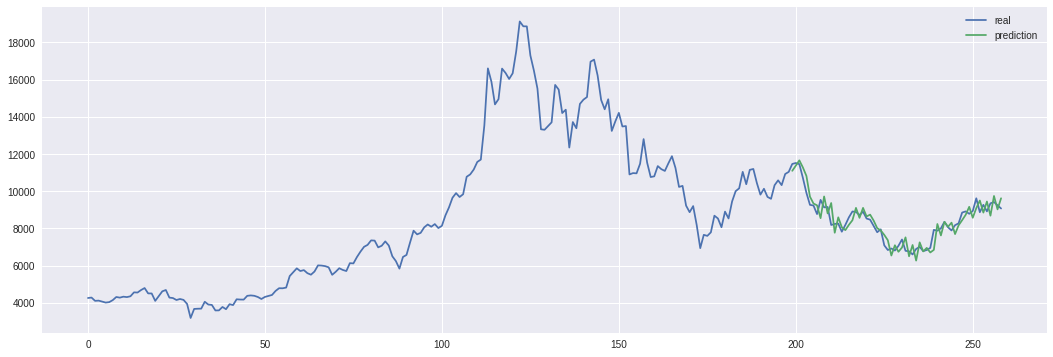

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,6))
plt.plot(Series(df['price'].values,index=range(df.shape[0])),label="real")
plt.plot(Series(_preds,index=range(df.shape[0]-test_size,df.shape[0])),label="prediction")
plt.legend()
plt.show()